## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.tail()

,DATE,TAG,POSTS
2309,2022-06-01 00:00:00,php,4424
2310,2022-06-01 00:00:00,python,24136
2311,2022-06-01 00:00:00,r,4646
2312,2022-06-01 00:00:00,ruby,503
2313,2022-06-01 00:00:00,swift,1956


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(2314, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count

<bound method DataFrame.count of                      DATE       TAG  POSTS
0     2008-07-01 00:00:00        c#      3
1     2008-08-01 00:00:00  assembly      8
2     2008-08-01 00:00:00         c     83
3     2008-08-01 00:00:00        c#    506
4     2008-08-01 00:00:00       c++    164
...                   ...       ...    ...
2309  2022-06-01 00:00:00       php   4424
2310  2022-06-01 00:00:00    python  24136
2311  2022-06-01 00:00:00         r   4646
2312  2022-06-01 00:00:00      ruby    503
2313  2022-06-01 00:00:00     swift   1956

[2314 rows x 3 columns]>

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,40630
c,381416
c#,1544452
c++,768478
delphi,49730
go,62314
java,1851332
javascript,2390284
perl,66839


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,167,167
c,167,167
c#,168,168
c++,167,167
delphi,167,167
go,152,152
java,167,167
javascript,167,167
perl,167,167


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df.DATE = pd.to_datetime(df.DATE)

In [9]:
df['DATE']

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2309   2022-06-01
2310   2022-06-01
2311   2022-06-01
2312   2022-06-01
2313   2022-06-01
Name: DATE, Length: 2314, dtype: datetime64[ns]

In [10]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

## Data Manipulation



In [11]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1150.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,502.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,225.0,1789.0,5828.0,3478.0,188.0,688.0,7269.0,15449.0,97.0,3720.0,22620.0,4338.0,456.0,1880.0
2022-03-01,254.0,2102.0,6485.0,3845.0,134.0,830.0,8117.0,16358.0,105.0,3769.0,24577.0,5085.0,528.0,2076.0
2022-04-01,265.0,1878.0,5961.0,3861.0,122.0,757.0,7875.0,16028.0,101.0,3828.0,23649.0,4781.0,494.0,1777.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [12]:
reshaped_df.fillna(0, inplace=True) 

In [13]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1150.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,581.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-01,225.0,1789.0,5828.0,3478.0,188.0,688.0,7269.0,15449.0,97.0,3720.0,22620.0,4338.0,456.0,1880.0
2022-03-01,254.0,2102.0,6485.0,3845.0,134.0,830.0,8117.0,16358.0,105.0,3769.0,24577.0,5085.0,528.0,2076.0
2022-04-01,265.0,1878.0,5961.0,3861.0,122.0,757.0,7875.0,16028.0,101.0,3828.0,23649.0,4781.0,494.0,1777.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

<AxesSubplot:xlabel='DATE'>

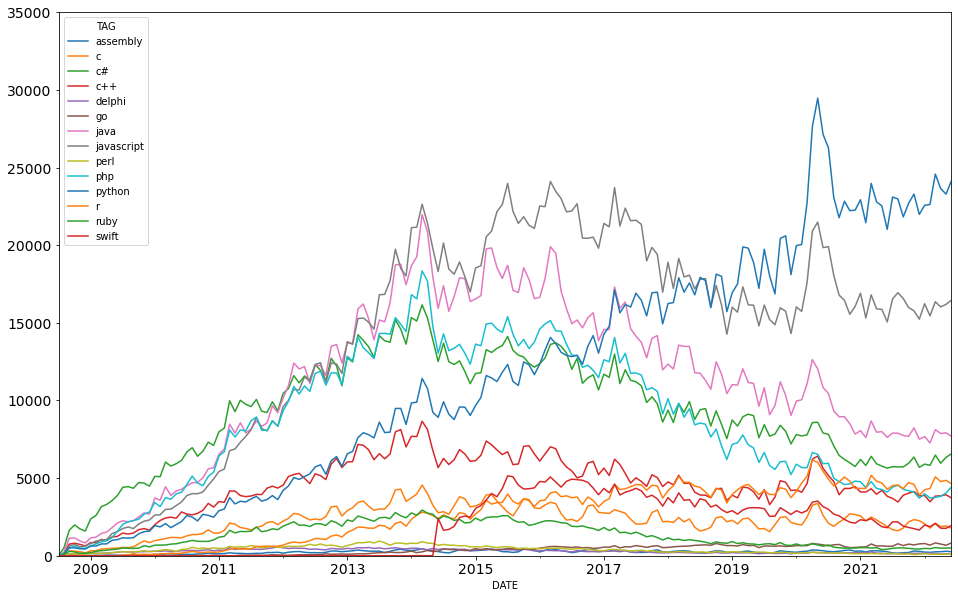

In [20]:
reshaped_df.plot(kind="line", figsize=(16,10), fontsize=14, ylim=(0,35000))
#replace with any lang in here for tables

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

<AxesSubplot:xlabel='DATE'>

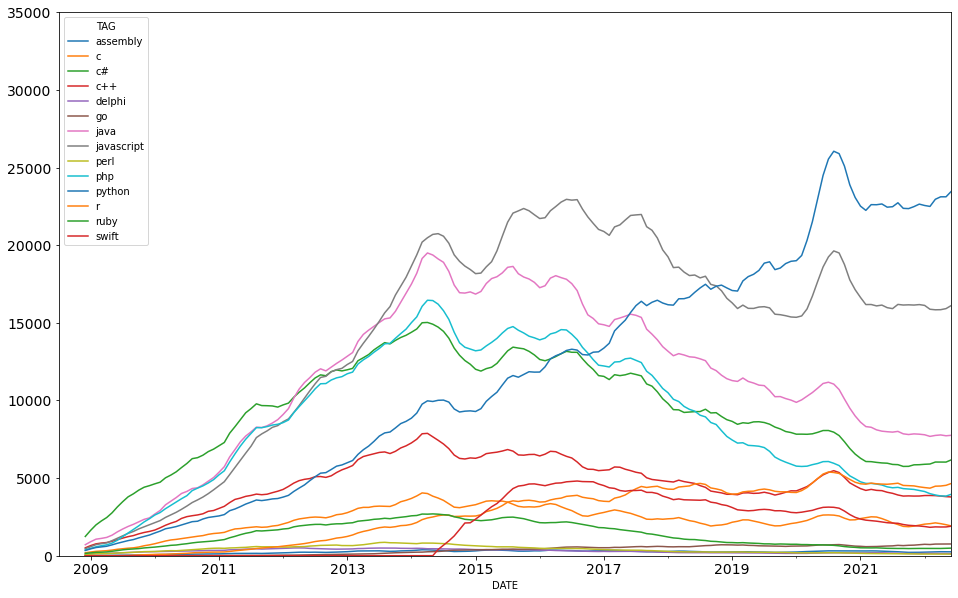

In [21]:
roll_df = reshaped_df.rolling(window=6).mean()
roll_df.plot(kind="line", figsize=(16,10), fontsize=14, ylim=(0,35000))